# Working on lab reports today

In [1]:
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt

In [5]:
## class 2
raw = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/ethanweed/OpenSesame/master/Class2/Class2_results.csv'))

df2 = pd.DataFrame({'id': raw.jatosStudyResultId,
                 'block': raw.Block,
                 'category': raw.Category,
                 'condition': raw.Mod_level,
                 'prime': raw.prime,
                 'target': raw.target,
                 'word_length': raw.word_length,
                 'rt': raw.response_time,
                  'correct': raw.correct})
df2 = df2.loc[df2['block'] != 'practice']

## class 1
raw = pd.read_csv('https://raw.githubusercontent.com/ethanweed/OpenSesame/master/Class1/Class1_results.csv')

df1 = pd.DataFrame({'Accuracy': raw['correct'],
                    'ID': raw['jatosStudyResultId'],
                    'RT': raw['response_time'],
                     'Prime': raw['prime'],
                     'Target': raw['target'],
                     'WordLength': raw['num_letters'],
                     'Condition': raw['condition']
                    })

df1 = df1.loc[df1['Condition'] != 'practice']

<AxesSubplot:xlabel='condition', ylabel='rt'>

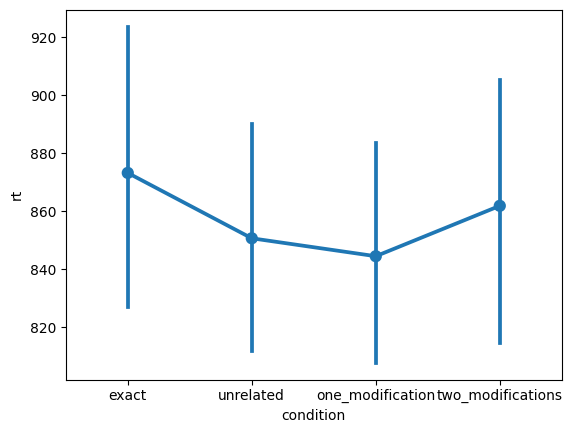

In [6]:
# class 2 code 
sorter = ['exact', 'unrelated', 'one_modification', 'two_modifications']

df2.condition = df2.condition.astype("category")
df2.condition = df2.condition.cat.set_categories(sorter)

sns.pointplot(data = df2, x = 'condition', y = 'rt')

<AxesSubplot:xlabel='Condition', ylabel='RT'>

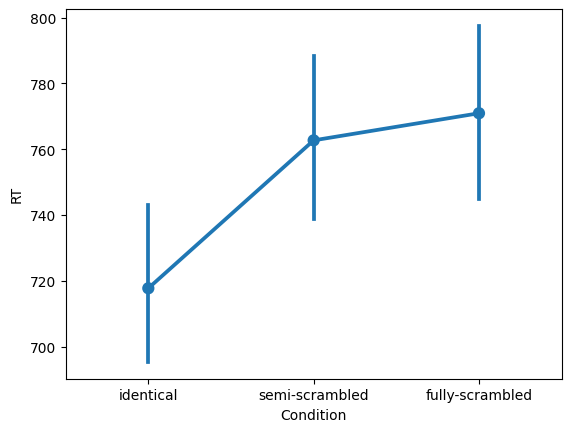

In [7]:
sns.pointplot(data = df1, x = 'Condition', y = 'RT')

In [9]:
# class 1
len(df1['ID'].unique())

11

In [11]:
# class 2
len(df2['id'].unique())

13

In [12]:
# class 1

pg.rm_anova(data = df1, dv = 'RT', within = ['Condition'], subject = 'ID')


,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Condition,2,20,6.370062,0.007236,0.077244,0.722182


In [13]:
# class 2
pg.rm_anova(data = df2, dv = 'rt', within = ['condition'], subject = 'id')



,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,condition,3,36,0.209873,0.8889,0.004975,0.728069


In [17]:


df2.groupby('id').mean()


,word_length,rt,correct
id,,,
983,4.269231,788.365385,0.923077
984,4.269231,864.596154,0.980769
988,4.269231,1049.038462,0.903846
990,4.269231,735.326923,0.846154
995,4.269231,827.326923,0.961538
996,4.269231,860.865385,0.807692
998,4.269231,976.230769,0.903846
999,4.269231,779.096154,0.846154
1000,4.269231,1000.750000,0.903846


<AxesSubplot:xlabel='Condition', ylabel='RT'>

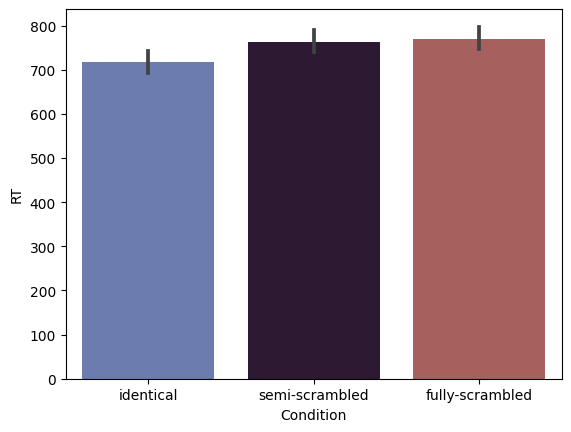

In [20]:
sns.violinplot(data = df1, x = 'Condition', y = 'RT', palette = 'twilight')

<AxesSubplot:xlabel='rt', ylabel='Density'>

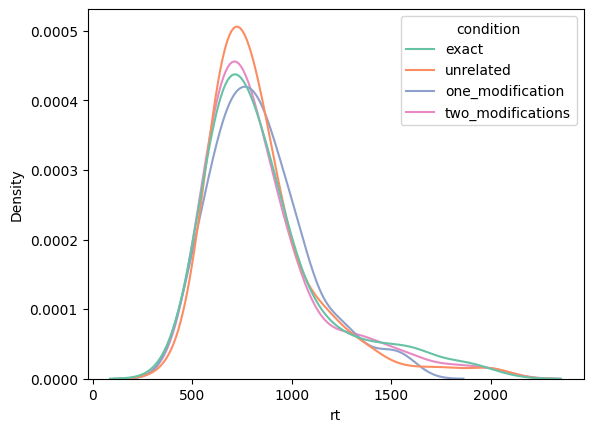

In [26]:
sns.kdeplot(data = df2, x = 'rt', hue = 'condition', palette = 'Set2')

In [27]:
# dv mean dependent variable, within refers to your independent variable(s)
pg.rm_anova(data = df1, dv = 'RT', within = ['Condition'], subject = 'ID')


,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Condition,2,20,6.370062,0.007236,0.077244,0.722182


A one-way repeated measures ANOVA was performed to compare the effect of [independent variable] on [dependent variable].
 
There [was or was not] a statistically significant difference in [dependent variable] between at least two groups (F(between groups df, within groups df) = [F-value], p = [p-value]).